In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from __future__ import division

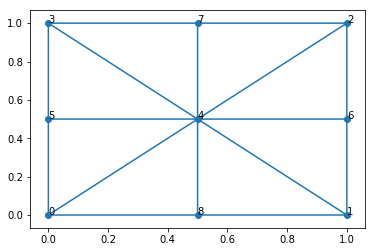

In [2]:
x = np.array([0, 1, 1, 0, .5,  0,  1, .5, .5])
y = np.array([0, 0, 1, 1, .5, .5, .5,  1,  0])
triangles = np.array([[0, 8, 4], [8, 4, 1], [1, 4, 6],
                      [4, 6, 2], [2, 4, 7], [7, 4, 3],
                      [3, 4, 5], [5, 4, 0]])
triangulation = tri.Triangulation(x, y, triangles=triangles)
plt.triplot(triangulation)
plt.scatter(x, y, marker='o')
for i in range(9):
    plt.annotate(i, (x[i], y[i]))
plt.show()

Calculate Cell Contributions. Loop through elements:
Recall $A[i, j] += \int_D \frac{1}{\sigma_t}\Omega \cdot \nabla \varphi_i \Omega \cdot \nabla \varphi_j + \int_D \sigma_t \varphi_i \varphi_j$

Element 0, calculate basis functions:


In [3]:
V = np.array([[1, 0, 0], [1, .5, 0], [1, .5, .5]])
C = np.linalg.inv(V)
C

array([[ 1.,  0.,  0.],
       [-2.,  2.,  0.],
       [ 0., -2.,  2.]])

Basis functions (using global node numbers as indicies):

$\varphi_0 = 1 -2x \\
\varphi_8 = 2x - 2y \\
\varphi_4 = 2y$

$\int_D \varphi_0 \varphi_0 = \int_0^{.5} \int_0^x (1-2x)^2 dy dx = \frac{1}{48} \\
\int_D \varphi_0 \varphi_8 = \int_0^{.5} \int_0^x (1-2x)(2x-2y) dy dx = \frac{1}{96} \\
\int_D \varphi_0 \varphi_4 = \int_0^{.5} \int_0^x (1-2x)(2y) dy dx = \frac{1}{96} \\
\int_D \varphi_8 \varphi_0 = \int_0^{.5} \int_0^x (1-2x)(2x-2y) dy dx = \frac{1}{96} \\
\int_D \varphi_8 \varphi_8 = \int_0^{.5} \int_0^x (2x-2y)^2 dy dx = \frac{1}{48} \\
\int_D \varphi_8 \varphi_4 = \int_0^{.5} \int_0^x (2x-2y)(2y) dy dx = \frac{1}{96} \\
\int_D \varphi_4 \varphi_0 = \int_0^{.5} \int_0^x (1-2x)(2y) dy dx = \frac{1}{96} \\
\int_D \varphi_4 \varphi_8 = \int_0^{.5} \int_0^x (2x-2y)(2y) dy dx = \frac{1}{96} \\
\int_D \varphi_4 \varphi_4 = \int_0^{.5} \int_0^x (2y)^2 dy dx = \frac{1}{48} $

Element 1. Calculate Basis Functions

In [4]:
V = np.array([[1, 1, 0], [1, .5, 0], [1, .5, .5]])
C = np.linalg.inv(V)
C

array([[-1.,  2.,  0.],
       [ 2., -2.,  0.],
       [ 0., -2.,  2.]])

$\varphi_1 = -1 + 2x \\
\varphi_8 = 2 - 2x - 2y \\
\varphi_4 = 2y$

$ \int_D \varphi_1 \varphi_1 = \int_{.5}^1 \int_0^{-x+1} (-1+2x)^2 dy dx = \frac{1}{48} \\
 \int_D \varphi_1 \varphi_8 = \int_{.5}^1 \int_0^{-x+1} (-1+2x)(2-2x-2y) dy dx = \frac{1}{96} \\
$

we can see the pattern... 

Element 2. Calculate Basis Functions

In [5]:
V = np.array([[1, 1, 0], [1, 1, .5], [1, .5, .5]])
C = np.linalg.inv(V)
C

array([[ 1., -2.,  2.],
       [ 0.,  2., -2.],
       [-2.,  2.,  0.]])

$\varphi_1 = 1 - 2y \\
\varphi_7 = -2 + 2x + 2y \\
\varphi_4 = 2 - 2x$

Element 3. Calculate Basis Functions.

In [6]:
V = np.array([[1, 1, 1], [1, 1, .5], [1, .5, .5]])
C = np.linalg.inv(V)
C

array([[-1.,  0.,  2.],
       [ 0.,  2., -2.],
       [ 2., -2.,  0.]])

$\varphi_2 = -1 + 2y \\
\varphi_7 = 2x - 2y \\
\varphi_4 = 2 - 2x$

Element 4. Calculate Basis Functions.

In [7]:
V = np.array([[1, 1, 1], [1, .5, 1], [1, .5, .5]])
C = np.linalg.inv(V)
C

array([[-1.,  0.,  2.],
       [ 2., -2.,  0.],
       [ 0.,  2., -2.]])

$\varphi_2 = -1 + 2x \\
\varphi_6 = -2x + 2 \\
\varphi_4 = 2 -2y$

Element 5. Calculate Basis Functions. 

In [8]:
V = np.array([[1, 0, 1], [1, .5, 1], [1, .5, .5]])
C = np.linalg.inv(V)
C

array([[ 1., -2.,  2.],
       [-2.,  2.,  0.],
       [ 0.,  2., -2.]])

$\varphi_3 = 1 - 2x \\
\varphi_6 = -2 + 2x + 2y \\
\varphi_4 = 2 - 2y $

Element 6. Calculate Basis Functions.

In [9]:
V = np.array([[1, 0, 1], [1, 0, .5], [1, .5, .5]])
C = np.linalg.inv(V)
C

array([[-1.,  2.,  0.],
       [ 0., -2.,  2.],
       [ 2., -2.,  0.]])

$\varphi_3 = -1 + 2y \\
\varphi_5 = 2 - 2x - 2y \\
\varphi_4 = 2x$

Element 7. Calculate Basis Functions.

In [10]:
V = np.array([[1, 0, 0], [1, 0, .5], [1, .5, .5]])
C = np.linalg.inv(V)
C

array([[ 1.,  0.,  0.],
       [ 0., -2.,  2.],
       [-2.,  2.,  0.]])

$\varphi_0 = 1 - 2y \\
\varphi_5 = -2x + 2y \\
\varphi_4 = 2x$

Calculate Boundary Contributions:
$ \int_{\Gamma}\hat{n} \cdot \Omega \varphi_i \varphi_j$

##### Boundary Bottom
Element 0:
$\int_{\Gamma}\hat{n} \cdot \Omega \varphi_0 \varphi_0 = \hat{n} \cdot \Omega \int_0^{.5} (1-2x)^2 dx = \frac{1}{6} \\ 
\int_{\Gamma}\hat{n} \cdot \Omega \varphi_0 \varphi_8 = \hat{n} \cdot \Omega \int_0^{.5} (1-2x)(2x) dx = \frac{1}{12} \\
\int_{\Gamma}\hat{n} \cdot \Omega \varphi_8 \varphi_0 = \hat{n} \cdot \Omega \int_0^{.5} (1-2x)(2x) dx = \frac{1}{12} \\
\int_{\Gamma}\hat{n} \cdot \Omega \varphi_8 \varphi_8 = \hat{n} \cdot \Omega \int_0^{.5} (2x)^2 dx = \frac{1}{6} 
$ 
Element 1:
$
\int_{\Gamma}\hat{n} \cdot \Omega \varphi_8 \varphi_8 = \hat{n} \cdot \Omega \int_{.5}^{1} (2-2x)^2 dx = \frac{1}{6}$

and we see the pattern...

In [11]:
def cell_contribution(A, omega, sigt):
    # Contribution from first part 
    area = 1/8
    # Element 0
    grad0 = np.array([-2, 0])
    grad8 = np.array([2, -2])
    grad4 = np.array([0, 2])
    A[0, 0] += 1/sigt*area*np.dot(omega, grad0)*np.dot(omega, grad0)
    A[0, 8] += 1/sigt*area*np.dot(omega, grad0)*np.dot(omega, grad8)
    A[0, 4] += 1/sigt*area*np.dot(omega, grad0)*np.dot(omega, grad4)
    A[8, 0] += 1/sigt*area*np.dot(omega, grad8)*np.dot(omega, grad0)
    A[8, 8] += 1/sigt*area*np.dot(omega, grad8)*np.dot(omega, grad8)
    A[8, 4] += 1/sigt*area*np.dot(omega, grad8)*np.dot(omega, grad4)
    A[4, 0] += 1/sigt*area*np.dot(omega, grad4)*np.dot(omega, grad0)
    A[4, 8] += 1/sigt*area*np.dot(omega, grad4)*np.dot(omega, grad8)
    A[4, 4] += 1/sigt*area*np.dot(omega, grad4)*np.dot(omega, grad4)
    
    A[0, 0] += 1/48
    A[0, 8] += 1/96
    A[0, 4] += 1/96
    A[8, 0] += 1/96
    A[8, 8] += 1/48
    A[8, 4] += 1/96
    A[4, 0] += 1/96
    A[4, 8] += 1/96
    A[4, 4] += 1/48
    
    # Element 1
    grad1 = np.array([2, 0])
    grad8 = np.array([-2, -2])
    grad4 = np.array([0, 2])
    
    A[1, 1] += 1/sigt*area*np.dot(omega, grad1)*np.dot(omega, grad1)
    A[1, 8] += 1/sigt*area*np.dot(omega, grad1)*np.dot(omega, grad8)
    A[1, 4] += 1/sigt*area*np.dot(omega, grad1)*np.dot(omega, grad4)
    A[8, 1] += 1/sigt*area*np.dot(omega, grad8)*np.dot(omega, grad1)
    A[8, 8] += 1/sigt*area*np.dot(omega, grad8)*np.dot(omega, grad8)
    A[8, 4] += 1/sigt*area*np.dot(omega, grad8)*np.dot(omega, grad4)
    A[4, 1] += 1/sigt*area*np.dot(omega, grad4)*np.dot(omega, grad1)
    A[4, 8] += 1/sigt*area*np.dot(omega, grad4)*np.dot(omega, grad8)
    A[4, 4] += 1/sigt*area*np.dot(omega, grad4)*np.dot(omega, grad4)
    
    A[1, 1] += 1/48
    A[1, 8] += 1/96
    A[1, 4] += 1/96
    A[8, 1] += 1/96
    A[8, 8] += 1/48
    A[8, 4] += 1/96
    A[4, 1] += 1/96
    A[4, 8] += 1/96
    A[4, 4] += 1/48
    
    # Element 2
    grad1 = np.array([0, -2])
    grad7 = np.array([2, 2])
    grad4 = np.array([-2, 0])
    
    A[1, 1] += 1/sigt*area*np.dot(omega, grad1)*np.dot(omega, grad1)
    A[1, 7] += 1/sigt*area*np.dot(omega, grad1)*np.dot(omega, grad7)
    A[1, 4] += 1/sigt*area*np.dot(omega, grad1)*np.dot(omega, grad4)
    A[7, 1] += 1/sigt*area*np.dot(omega, grad7)*np.dot(omega, grad1)
    A[7, 7] += 1/sigt*area*np.dot(omega, grad7)*np.dot(omega, grad7)
    A[7, 4] += 1/sigt*area*np.dot(omega, grad7)*np.dot(omega, grad4)
    A[4, 1] += 1/sigt*area*np.dot(omega, grad4)*np.dot(omega, grad1)
    A[4, 7] += 1/sigt*area*np.dot(omega, grad4)*np.dot(omega, grad7)
    A[4, 4] += 1/sigt*area*np.dot(omega, grad4)*np.dot(omega, grad4)
    
    A[1, 1] += 1/48
    A[1, 7] += 1/96
    A[1, 4] += 1/96
    A[7, 1] += 1/96
    A[7, 7] += 1/48
    A[7, 4] += 1/96
    A[4, 1] += 1/96
    A[4, 7] += 1/96
    A[4, 4] += 1/48
    
    #Element 3
    grad2 = np.array([0, 2])
    grad7 = np.array([2, -2])
    grad4 = np.array([-2, 0])
    
    A[2, 2] += 1/sigt*area*np.dot(omega, grad2)*np.dot(omega, grad2)
    A[2, 7] += 1/sigt*area*np.dot(omega, grad2)*np.dot(omega, grad7)
    A[2, 4] += 1/sigt*area*np.dot(omega, grad2)*np.dot(omega, grad4)
    A[7, 2] += 1/sigt*area*np.dot(omega, grad7)*np.dot(omega, grad2)
    A[7, 7] += 1/sigt*area*np.dot(omega, grad7)*np.dot(omega, grad7)
    A[7, 4] += 1/sigt*area*np.dot(omega, grad7)*np.dot(omega, grad4)
    A[4, 2] += 1/sigt*area*np.dot(omega, grad4)*np.dot(omega, grad2)
    A[4, 7] += 1/sigt*area*np.dot(omega, grad4)*np.dot(omega, grad7)
    A[4, 4] += 1/sigt*area*np.dot(omega, grad4)*np.dot(omega, grad4)
    
    A[2, 2] += 1/48
    A[2, 7] += 1/96
    A[2, 4] += 1/96
    A[7, 2] += 1/96
    A[7, 7] += 1/48
    A[7, 4] += 1/96
    A[4, 2] += 1/96
    A[4, 7] += 1/96
    A[4, 4] += 1/48
    
    # Element 4
    grad2 = np.array([2, 0])
    grad6 = np.array([-2, 2])
    grad4 = np.array([0, -2])
    
    A[2, 2] += 1/sigt*area*np.dot(omega, grad2)*np.dot(omega, grad2)
    A[2, 6] += 1/sigt*area*np.dot(omega, grad2)*np.dot(omega, grad6)
    A[2, 4] += 1/sigt*area*np.dot(omega, grad2)*np.dot(omega, grad4)
    A[6, 2] += 1/sigt*area*np.dot(omega, grad6)*np.dot(omega, grad2)
    A[6, 6] += 1/sigt*area*np.dot(omega, grad6)*np.dot(omega, grad6)
    A[6, 4] += 1/sigt*area*np.dot(omega, grad6)*np.dot(omega, grad4)
    A[4, 2] += 1/sigt*area*np.dot(omega, grad4)*np.dot(omega, grad2)
    A[4, 6] += 1/sigt*area*np.dot(omega, grad4)*np.dot(omega, grad6)
    A[4, 4] += 1/sigt*area*np.dot(omega, grad4)*np.dot(omega, grad4)
    
    A[2, 2] += 1/48
    A[2, 6] += 1/96
    A[2, 4] += 1/96
    A[6, 2] += 1/96
    A[6, 6] += 1/48
    A[6, 4] += 1/96
    A[4, 2] += 1/96
    A[4, 6] += 1/96
    A[4, 4] += 1/48
    
    # Element 5
    grad3 = np.array([-2, 0])
    grad6 = np.array([2, 2])
    grad4 = np.array([0, -2])
    
    A[3, 3] += 1/sigt*area*np.dot(omega, grad3)*np.dot(omega, grad3)
    A[3, 6] += 1/sigt*area*np.dot(omega, grad3)*np.dot(omega, grad6)
    A[3, 4] += 1/sigt*area*np.dot(omega, grad3)*np.dot(omega, grad4)
    A[6, 3] += 1/sigt*area*np.dot(omega, grad6)*np.dot(omega, grad3)
    A[6, 6] += 1/sigt*area*np.dot(omega, grad6)*np.dot(omega, grad6)
    A[6, 4] += 1/sigt*area*np.dot(omega, grad6)*np.dot(omega, grad4)
    A[4, 3] += 1/sigt*area*np.dot(omega, grad4)*np.dot(omega, grad3)
    A[4, 6] += 1/sigt*area*np.dot(omega, grad4)*np.dot(omega, grad6)
    A[4, 4] += 1/sigt*area*np.dot(omega, grad4)*np.dot(omega, grad4)
    
    A[3, 3] += 1/48
    A[3, 6] += 1/96
    A[3, 4] += 1/96
    A[6, 3] += 1/96
    A[6, 6] += 1/48
    A[6, 4] += 1/96
    A[4, 3] += 1/96
    A[4, 6] += 1/96
    A[4, 4] += 1/48
    
    # Element 6
    grad3 = np.array([0, 2])
    grad5 = np.array([-2, -2])
    grad4 = np.array([2, 0])
    
    A[3, 3] += 1/sigt*area*np.dot(omega, grad3)*np.dot(omega, grad3)
    A[3, 5] += 1/sigt*area*np.dot(omega, grad3)*np.dot(omega, grad5)
    A[3, 4] += 1/sigt*area*np.dot(omega, grad3)*np.dot(omega, grad4)
    A[5, 3] += 1/sigt*area*np.dot(omega, grad5)*np.dot(omega, grad3)
    A[5, 5] += 1/sigt*area*np.dot(omega, grad5)*np.dot(omega, grad5)
    A[5, 4] += 1/sigt*area*np.dot(omega, grad5)*np.dot(omega, grad4)
    A[4, 3] += 1/sigt*area*np.dot(omega, grad4)*np.dot(omega, grad3)
    A[4, 5] += 1/sigt*area*np.dot(omega, grad4)*np.dot(omega, grad5)
    A[4, 4] += 1/sigt*area*np.dot(omega, grad4)*np.dot(omega, grad4)
    
    A[3, 3] += 1/48
    A[3, 5] += 1/96
    A[3, 4] += 1/96
    A[5, 3] += 1/96
    A[5, 5] += 1/48
    A[5, 4] += 1/96
    A[4, 3] += 1/96
    A[4, 5] += 1/96
    A[4, 4] += 1/48
    
    # Element 7
    grad0 = np.array([0, -2])
    grad5 = np.array([-2, 2])
    grad4 = np.array([2, 0])
    
    A[0, 0] += 1/sigt*area*np.dot(omega, grad0)*np.dot(omega, grad0)
    A[0, 5] += 1/sigt*area*np.dot(omega, grad0)*np.dot(omega, grad5)
    A[0, 4] += 1/sigt*area*np.dot(omega, grad0)*np.dot(omega, grad4)
    A[5, 0] += 1/sigt*area*np.dot(omega, grad5)*np.dot(omega, grad0)
    A[5, 5] += 1/sigt*area*np.dot(omega, grad5)*np.dot(omega, grad5)
    A[5, 4] += 1/sigt*area*np.dot(omega, grad5)*np.dot(omega, grad4)
    A[4, 0] += 1/sigt*area*np.dot(omega, grad4)*np.dot(omega, grad0)
    A[4, 5] += 1/sigt*area*np.dot(omega, grad4)*np.dot(omega, grad5)
    A[4, 4] += 1/sigt*area*np.dot(omega, grad4)*np.dot(omega, grad4)
    
    A[0, 0] += 1/48
    A[0, 5] += 1/96
    A[0, 4] += 1/96
    A[5, 0] += 1/96
    A[5, 5] += 1/48
    A[5, 4] += 1/96
    A[4, 0] += 1/96
    A[4, 5] += 1/96
    A[4, 4] += 1/48
    
    return A

In [12]:
def boundary_bottom(A, omega):
    A[0, 0] += np.abs(omega[0])*1/6
    A[0, 8] += np.abs(omega[0])*1/12
    A[8, 0] += np.abs(omega[0])*1/12
    A[8, 8] += np.abs(omega[0])*1/6
    
    A[8, 8] += np.abs(omega[0])*1/6
    A[8, 1] += np.abs(omega[0])*1/12
    A[1, 8] += np.abs(omega[0])*1/12
    A[1, 1] += np.abs(omega[0])*1/6
    return A

In [13]:
def boundary_right(A, omega):
    A[1, 1] += np.abs(omega[1])*1/6
    A[1, 7] += np.abs(omega[1])*1/12
    A[7, 1] += np.abs(omega[1])*1/12
    A[7, 7] += np.abs(omega[1])*1/6
    
    A[7, 7] += np.abs(omega[1])*1/6
    A[7, 2] += np.abs(omega[1])*1/12
    A[2, 7] += np.abs(omega[1])*1/12
    A[2, 2] += np.abs(omega[1])*1/6
    return A

In [14]:
def boundary_top(A, omega):
    A[2, 2] += np.abs(omega[0])*1/6
    A[2, 6] += np.abs(omega[0])*1/12
    A[6, 2] += np.abs(omega[0])*1/12
    A[6, 6] += np.abs(omega[0])*1/6
    
    A[6, 6] += np.abs(omega[0])*1/6
    A[6, 3] += np.abs(omega[0])*1/12
    A[3, 6] += np.abs(omega[0])*1/12
    A[3, 3] += np.abs(omega[0])*1/6
    return A

In [15]:
def boundary_left(A, omega):
    A[3, 3] += np.abs(omega[1])*1/6
    A[3, 5] += np.abs(omega[1])*1/12
    A[5, 3] += np.abs(omega[1])*1/12
    A[5, 5] += np.abs(omega[1])*1/6
    
    A[5, 5] += np.abs(omega[1])*1/6
    A[5, 0] += np.abs(omega[1])*1/12
    A[0, 0] += np.abs(omega[1])*1/12
    A[0, 0] += np.abs(omega[1])*1/6
    return A

In [20]:
omega = np.array([.5773503,.5773503])
sigt = 1
inv_sigt = 1
A = np.zeros((9, 9))
print(A[2, 6])
#A = cell_contribution(A, omega, inv_sigt)
print(A[2, 6])
A = boundary_right(A, omega)
print(A[2, 6])
A = boundary_top(A, omega)
print(A[2, 6])

0.0
0.0
0.0
0.048112525


In [21]:
1/12

0.08333333333333333

In [24]:
(-(.5-0)/2*1/np.sqrt(3)+(.5+0)/2)

0.10566243270259354